<a href="https://colab.research.google.com/github/SaumyajitDas001/COMSYS_Hackathon/blob/main/TaskA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
zip_path = "/content/train.zip"
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
zip_path = "/content/val.zip"
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7716 - loss: 0.6346 - val_accuracy: 0.8128 - val_loss: 0.4185
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8480 - loss: 0.3628 - val_accuracy: 0.8223 - val_loss: 0.3889
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8536 - loss: 0.3445 - val_accuracy: 0.8341 - val_loss: 0.3969
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8680 - loss: 0.3074 - val_accuracy: 0.8555 - val_loss: 0.3690
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8830 - loss: 0.2829 - val_accuracy: 0.8341 - val_loss: 0.4057
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9040 - loss: 0.2689 - val_accuracy: 0.8555 - val_loss: 0.3452
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8992 - loss: 0.2491 - val_accuracy: 0.8697 - val_loss: 0.3370
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9010 - loss: 0.2493 - val_accuracy: 0.8365 - val_loss:

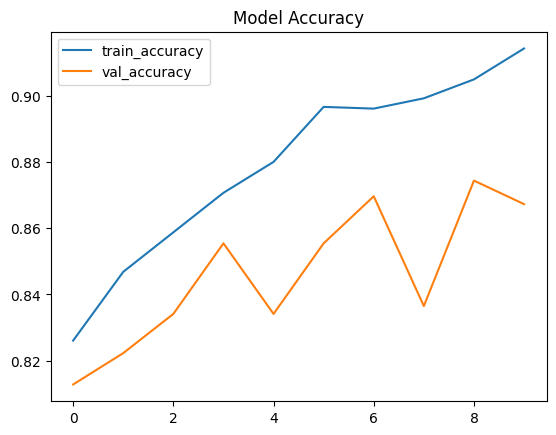

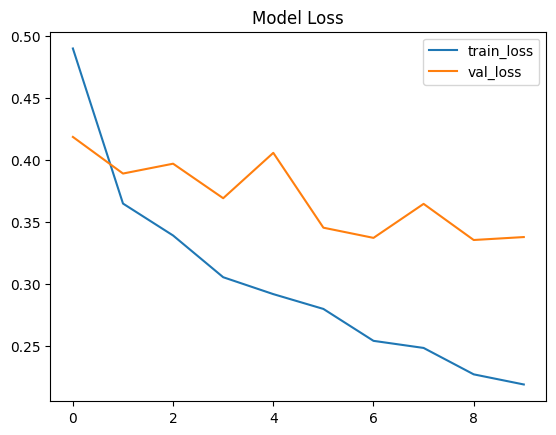

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/gender_classification_model.h5')
print("Model saved!")

Model saved!


In [ ]:
from google.colab import files

print(" Upload image file now:")
uploaded = files.upload()
img_path = next(iter(uploaded))
print(f"Image path: {img_path}")

 Upload image file now:


Saving handsome-happy-african-american-bearded-260nw-2460702995.webp to handsome-happy-african-american-bearded-260nw-2460702995.webp
Image path: handsome-happy-african-american-bearded-260nw-2460702995.webp


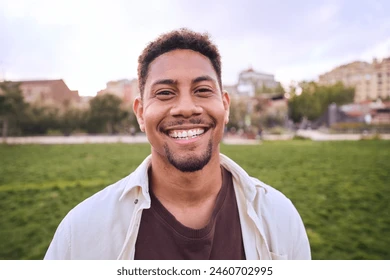

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
🧠 Predicted Gender: Male


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

model_path = "/content/gender_classification_model.h5"
model = load_model(model_path)

label_map = {0: "Female", 1: "Male"}

def predict_gender(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_display = Image.open(img_path)
    display(img_display)

    prediction = model.predict(img_array)

    if prediction.shape[1] == 1:
        pred_class = int(prediction[0][0] > 0.5)
    else:
        pred_class = np.argmax(prediction[0])

    print(f"🧠 Predicted Gender: {label_map[pred_class]}")

# Find uploaded image
image_filename = next((f for f in uploaded if f.endswith(('.jpg', '.jpeg', '.png' ,'.webp'))), None)

if image_filename:
    predict_gender(image_filename)
else:
    print("❌ No image file found.")

    os.remove(img_path)

In [ ]:
from google.colab import drive
drive.flush_and_unmount()